In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('Delhi.csv')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Average Delivery Rating (a1)   30 non-null     float64
 1   Average Orders per month (a2)  30 non-null     int64  
 2   "Delighted Members" Purchase   30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [30]:
df

,Average Delivery Rating (a1),Average Orders per month (a2),"""Delighted Members"" Purchase"
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
3,3.5,11,No
4,3.5,11,No
5,4.5,11,Yes
6,1.5,13,Yes
7,2.5,13,No
8,2.5,13,No
9,3.5,13,No


In [31]:
df.columns = ['Avg Delivery' , 'Avg Orders' ,'Purchase']

In [32]:
df['Purchase'].value_counts()

Yes    15
No     15
Name: Purchase, dtype: int64

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
?DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 5 , min_samples_split = 5,min_samples_leaf = 5)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
df_train,df_test = train_test_split(df,train_size = 0.7,random_state = 50)

In [40]:
y_train = df_train.pop("Purchase")
X_train = df_train

y_test = df_test.pop("Purchase")
X_test = df_test

In [41]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)

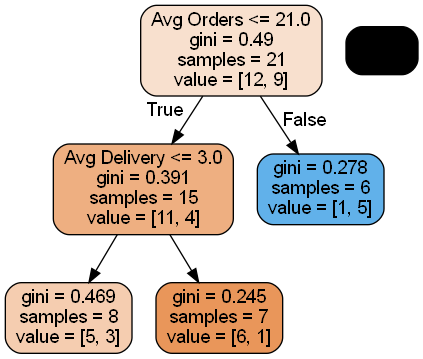

In [42]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [52]:
df2 = df[df['Avg Delivery'] < 3]

In [53]:
df2

,Avg Delivery,Avg Orders,Purchase
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
6,1.5,13,Yes
7,2.5,13,No
8,2.5,13,No
12,1.5,15,Yes
13,2.5,15,No
14,2.5,15,No
18,1.5,27,No


In [54]:
df2['Purchase'].value_counts()

No     8
Yes    7
Name: Purchase, dtype: int64

In [49]:
df3 = df[df['Avg Orders'] < 20]

In [50]:
df3

,Avg Delivery,Avg Orders,Purchase
0,1.5,11,Yes
1,2.5,11,No
2,2.5,11,No
3,3.5,11,No
4,3.5,11,No
5,4.5,11,Yes
6,1.5,13,Yes
7,2.5,13,No
8,2.5,13,No
9,3.5,13,No


In [51]:
df3['Purchase'].value_counts()

No     13
Yes     5
Name: Purchase, dtype: int64